In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

Step 1: read in data from the .xls file

In [2]:
DATA_FILE = 'data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [3]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [4]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [5]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [6]:
loss = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [7]:
def huber_loss(labels, predictions, delta=1.0):
    abs_error = tf.abs(labels - predictions)
    square_error = abs_error**2 * delta - 0.5 * tf.square(delta)
    cond = tf.greater(abs_error, delta)
    return tf.cond(cond, lambda: 0.5 * abs_error, lambda: square_error)

In [8]:
loss = huber_loss(Y, Y_predicted)

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [10]:
sess = tf.Session() # prefer with tf.Session() as sess: in your code

Step 7: initialize the necessary variables, in this case, w and b

In [11]:
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

Step 8: train the model

In [12]:
for i in range(50): # train the model 50 epochs
    total_loss = 0
    for x, y in data:
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
        total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

# close the writer when you're done using it
writer.close() 

Epoch 0: 16.018501993446122
Epoch 1: 14.544037773495628
Epoch 2: 13.108262351581029
Epoch 3: 11.665662101336888
Epoch 4: 10.426745731206168
Epoch 5: 9.767496824264526
Epoch 6: 9.454128040444283
Epoch 7: 9.20726067679269
Epoch 8: 9.002367342511812
Epoch 9: 8.835175447520756
Epoch 10: 8.726894460973286
Epoch 11: 8.621362515858241
Epoch 12: 8.576849330039252
Epoch 13: 8.561957314610481
Epoch 14: 8.501956946793056
Epoch 15: 8.480854204013234
Epoch 16: 8.449304391940435
Epoch 17: 8.464027103923616
Epoch 18: 8.449600619219598
Epoch 19: 8.4560789813598
Epoch 20: 8.448824392897743
Epoch 21: 8.451142364314624
Epoch 22: 8.447059888215293
Epoch 23: 8.447388079904375
Epoch 24: 8.444750456582932
Epoch 25: 8.44415119999931
Epoch 26: 8.442183354780788
Epoch 27: 8.441160644803729
Epoch 28: 8.439508990162896
Epoch 29: 8.438298443243617
Epoch 30: 8.436800679990224
Epoch 31: 8.43551122645537
Epoch 32: 8.434092460643678
Epoch 33: 8.432774164137387
Epoch 34: 8.431400435311454
Epoch 35: 8.430076995775813
Ep

Step 9: output the values of w and b

In [13]:
w, b = sess.run([w, b])

Step 10: plot the results

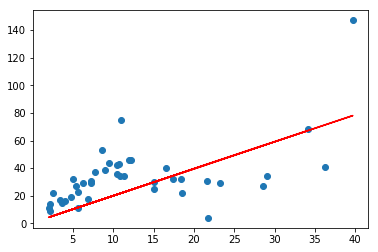

In [14]:
X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, label="Real data")
plt.plot(X, w * X + b, label="Predicted data", color='r')
plt.show()